In [3]:
# Install any required libraries (if not already installed)
# !pip install numpy pandas scikit-learn matplotlib

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# (a) Generate a simulated dataset
np.random.seed(42)  # For reproducibility
n_samples_per_class = 20
n_features = 50

# Generate data for three classes with distinct mean shifts
mean_shift_1 = np.random.normal(0, 1, (n_samples_per_class, n_features)) + 3  # Class 1 with mean shift
mean_shift_2 = np.random.normal(0, 1, (n_samples_per_class, n_features)) - 3  # Class 2 with mean shift
mean_shift_3 = np.random.normal(0, 1, (n_samples_per_class, n_features)) + 0  # Class 3 with no shift

# Combine the data into one dataset
data = np.vstack([mean_shift_1, mean_shift_2, mean_shift_3])

# Create labels for the classes
labels = np.array([1]*n_samples_per_class + [2]*n_samples_per_class + [3]*n_samples_per_class)

# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(data)
df['label'] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,3.496714,2.861736,3.647689,4.523030,2.765847,2.765863,4.579213,3.767435,2.530526,3.542560,...,3.171368,2.884352,2.698896,1.521478,2.280156,2.539361,4.057122,3.343618,1.236960,1
1,3.324084,2.614918,2.323078,3.611676,4.031000,3.931280,2.160782,2.690788,3.331263,3.975545,...,3.968645,2.297947,2.672338,2.607892,1.536485,3.296120,3.261055,3.005113,2.765413,1
2,1.584629,2.579355,2.657285,2.197723,2.838714,3.404051,4.886186,3.174578,3.257550,2.925554,...,4.307143,1.392517,3.184634,3.259883,3.781823,1.763049,1.679543,3.521942,3.296985,1
3,3.250493,3.346448,2.319975,3.232254,3.293072,2.285649,4.865775,3.473833,1.808697,3.656554,...,3.856399,3.214094,1.754261,3.173181,3.385317,2.116143,3.153725,3.058209,1.857030,1
4,3.357787,3.560785,4.083051,4.053802,1.622331,2.062175,3.515035,3.513786,3.515048,6.852731,...,2.885264,3.504987,3.865755,1.799704,2.665499,2.525055,2.346671,4.765454,3.404982,1


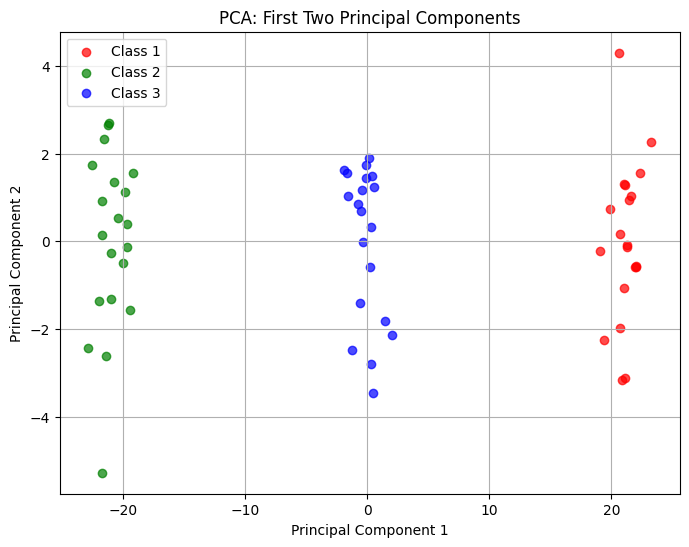

In [4]:
# (b) Perform PCA on the 60 observations
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('label', axis=1))

# Add PCA results to a DataFrame for easier plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = df['label']

# Plot the first two principal component score vectors
plt.figure(figsize=(8, 6))
colors = {1: 'red', 2: 'green', 3: 'blue'}
for label, color in colors.items():
    plt.scatter(pca_df[pca_df['label'] == label]['PC1'],
                pca_df[pca_df['label'] == label]['PC2'],
                color=color, label=f'Class {label}', alpha=0.7)

# Adding plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# (c) Perform K-means clustering with K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df.drop('label', axis=1))

# Create a DataFrame to compare the true labels and clustering labels
comparison_df = pd.DataFrame({'True Label': df['label'], 'Cluster Label': kmeans_labels})
cluster_comparison = pd.crosstab(comparison_df['True Label'], comparison_df['Cluster Label'])
print("\nK-means Clustering with K=3 on Raw Data:\n", cluster_comparison)


K-means Clustering with K=3 on Raw Data:
 Cluster Label   0   1   2
True Label               
1               0  20   0
2              20   0   0
3               0   0  20


In [6]:
# (d) Perform K-means clustering with K = 2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2_labels = kmeans_2.fit_predict(df.drop('label', axis=1))

# Create a DataFrame to compare the true labels and clustering labels for K=2
comparison_df_2 = pd.DataFrame({'True Label': df['label'], 'Cluster Label': kmeans_2_labels})
cluster_comparison_2 = pd.crosstab(comparison_df_2['True Label'], comparison_df_2['Cluster Label'])
print("\nK-means Clustering with K=2:\n", cluster_comparison_2)


K-means Clustering with K=2:
 Cluster Label   0   1
True Label           
1               0  20
2              20   0
3              20   0


In [7]:
# (e) Perform K-means clustering with K = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4_labels = kmeans_4.fit_predict(df.drop('label', axis=1))

# Create a DataFrame to compare the true labels and clustering labels for K=4
comparison_df_4 = pd.DataFrame({'True Label': df['label'], 'Cluster Label': kmeans_4_labels})
cluster_comparison_4 = pd.crosstab(comparison_df_4['True Label'], comparison_df_4['Cluster Label'])
print("\nK-means Clustering with K=4:\n", cluster_comparison_4)


K-means Clustering with K=4:
 Cluster Label   0   1  2   3
True Label                  
1               0  16  4   0
2              20   0  0   0
3               0   0  0  20


In [8]:
# (f) Perform K-means clustering with K = 3 on the first two principal component score vectors
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_df[['PC1', 'PC2']])

# Create a DataFrame to compare the true labels and clustering labels from PCA
comparison_pca_df = pd.DataFrame({'True Label': df['label'], 'Cluster Label': kmeans_pca_labels})
cluster_comparison_pca = pd.crosstab(comparison_pca_df['True Label'], comparison_pca_df['Cluster Label'])
print("\nK-means Clustering with K=3 on PCA components:\n", cluster_comparison_pca)


K-means Clustering with K=3 on PCA components:
 Cluster Label   0   1   2
True Label               
1               0  20   0
2              20   0   0
3               0   0  20


In [9]:
# (g) Perform K-means clustering with K = 3 after scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('label', axis=1))

# Perform K-means clustering with K=3 on the standardized data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled_labels = kmeans_scaled.fit_predict(scaled_data)

# Create a DataFrame to compare the true labels and clustering labels from the standardized data
comparison_scaled_df = pd.DataFrame({'True Label': df['label'], 'Cluster Label': kmeans_scaled_labels})
cluster_comparison_scaled = pd.crosstab(comparison_scaled_df['True Label'], comparison_scaled_df['Cluster Label'])
print("\nK-means Clustering with K=3 on Standardized Data:\n", cluster_comparison_scaled)


K-means Clustering with K=3 on Standardized Data:
 Cluster Label   0   1   2
True Label               
1               0  20   0
2              20   0   0
3               0   0  20
